# Neural Networks 

## Perceptron node
<table>
<tr>
<td> <img src="img/perceptron_node.png" alt="Drawing" style="width: 570px;"/> </td>
</tr>
</table>

The above [image](https://skymind.ai/wiki/neural-network) shows a one perceptron node, where weights are first multiplied by the input vlaues, and are summed. The sum is then passed through an activation function, and the output is recorded.

Lets take a simple example of only two 2-input neurons, $x$, weights $w$ and some bias $b$, that uses the sigmoid activation function, $f(x)$ for the activation:

\begin{equation}
x = \left(\begin{array}{c} 2 \\ 3 \end{array}\right); 
w = \left({\begin{array}{cc} 0 & 1 \end{array}}\right); 
b = 4 
\end{equation}

\begin{equation}
w.x + b  = 
\left({\begin{array}{cc} 0 & 1 \end{array}}\right)
%\left(\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array}\right)
\left(\begin{array}{c} 2 \\ 3 \end{array}\right) + 4 = 7
\end{equation}

\begin{equation}
f(x) = f(7) = \frac{1}{1+e^{-7}} = 0.99
\end{equation}


In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def netInput(x, w, b):
    return np.dot(w, x) + b 

x = np.array([2, 3])
w = np.array([0, 1]) 
b = 4 

n = netInput(x, w, b) 
f = sigmoid(n)
print ('output', round(f,3))

output 0.999


## Feed Forwad Neural Network

<table>
<tr>
<td> <img src="img/feedforward.png" alt="Drawing" style="width: 570px;"/> </td>
</tr>
</table>

Let $h_1$, $h_2$, $o_1$ be the outputs of the neurons as shown in above [image](https://miro.medium.com/max/550/1*x6KWjKTOBhUYL0MRX4M3oQ.png).

Continuing the same example of two 2-input neurons, $x$, weights $w$ and bias $b=4$, 

\begin{equation}
h_1 = h_2 = f(w.x + b)  = f(w.[2,3]+4) = f(7) = 0.999
\end{equation}

\begin{equation}
o_1  = f(w.[h_1, h_2] + b) = f((0*h_1)+(1*h_2) + b) = f(0 + 0.999+4) = f(0.999+4) = 0.993
\end{equation}


In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def netInput(self, x):
        y = np.dot(self.w, x) + self.b
        #print(np.dot(self.w, x), self.b)
        return sigmoid(y)

class NeuralNetwork:
    '''
    A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 4
    '''
    def __init__(self):
        w = np.array([0, 1])
        b = 4
    
        # The Neuron class here is from the previous section
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.o1 = Neuron(w, b)

    def feedforward(self, x):
        out_h1 = self.h1.netInput(x) # x = [x1, x2]
        out_h2 = self.h2.netInput(x)
        out_o1 = self.o1.netInput(np.array([out_h1, out_h2]))
        return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print ('o1:', round(network.feedforward(x),3))

o1: 0.993


## Loss:

Suppose the output $o_1$ classifies a gender, such as 0 indicate males and 1 indicate 0. The input data that features weight and height after some pre-processing looks like the following. Here $y_{true}$ is the true gender and $y_{pred}$ is the predicted outcome, say from some model. Original tutorial can be found [here](https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9).

| Name     |Weight(-135 lb)| Height(-66 in)  | $y_{true}$(Gender) | $y_{pred}$(Gender) | 
|  ------  |  ------      | ------           |  ------            |   ------           |        
| Margaret |    -2        |   -1             |     1              |   0                |
| Chris    |    25        |    6             |     0              |   0                |
| John     |    17        |    4             |     0              |   0                |
| Sadia    |     5        |   -3             |     1              |   0                |

Loss for this network is 

\begin{equation*} 
\hat{\sigma}^2 = \frac{\Sigma_i^n (Y_i - \hat{Y_i})^2}{n} = \frac{(1 + 0 + 0 + 1)}{4} = 0.5
\end{equation*}



In [17]:
import numpy as np

def mse_loss(y_true, y_hat):
    res = y_true - y_hat
    
    cost = np.mean(res**2, axis=0)
    return (cost)

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


## Training: Back Propagation

Lets minimize the loss, $L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$ of this neural network. 

<table>
<tr>
<td> <img src="img/feedforward2.png" alt="Drawing" style="width: 570px;"/> </td>
</tr>
</table>

For simplicity, lets consider only one input as Margaret, bias, b=0, and weights, w_1, w_2, w_3, w_4, w_5, w_6=1. Loss function in this case is

\begin{equation*} 
L = \hat{\sigma}^2 = \frac{\Sigma_i^n (Y_i - \hat{Y_i})^2}{n} = (1 - \hat{Y_i})^2
\end{equation*}

Lets evaluate the change in loss w.r.t weight $w_1$ for input Margaret. Chain rule allows us to write the following, which is also called *back propagation*.

\begin{equation*}
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat{Y_1}} \frac{\partial \hat{Y_1}} {\partial h_1} \frac{\partial h_1} {\partial w_1}
\end{equation*}

Lets first write another important equation, the derivative of sigmoid function, that we will need for the numerical calculations.

\begin{equation*}
f(x) = \frac{1}{1-e^{-x}} ; \\
f^{\prime}(x) = \frac{e^{-x}}{(1-e^{-x})^2} = f(x) (1 - f(x))
\end{equation*}

For input Margaret,$h_1$, $h_2$ and $\hat{Y_1}$ = $o_1$ are: 

\begin{eqnarray*}
h_1 &=& f(w_1 x_1 + w_2 x_2 + b_1) = f(-2-1+0) = 0.0474\\
h_2 &=& f(w_3 x_1 + w_4 x_2 + b_2) = 0.0474 \\
\hat{Y_1} &=& {o_1} = f(w_5 h_1 + w_6 h_2 + b_3) = f(0.0474 + 0.0474 + 0.0) = 0.524
\end{eqnarray*}

Lets find all other partial derivatives.

\begin{equation*}
\frac{\partial L}{\partial \hat{Y_1}} = -2 (1 - \hat{Y_1}) = -2(1 - 0.524) = -0.952
\end{equation*}

\begin{equation*}
\frac{\partial \hat{Y_1}}{\partial h_1} = w_5 * f^{\prime}(w_5 h_1 + w_6 h_2 + b_3 ) = 1 * f^{\prime}(0.0474+0.0474+0) = 1 * f(0.0948)(1-f(0.0948)) = 0.249
\end{equation*}

\begin{equation*}
\frac{\partial h_1}{\partial w_1} = x_1 * f^{\prime}(w_1 x_1 + w_2 x_2 + b_1 ) = -2 * f^{\prime}(-2-1+0) = -2 *  f(-3)(1-f(-3)) = -0.0904 
\end{equation*}

Therefore,

\begin{equation*}
\frac{\partial L}{\partial w_1} = -0.952 * 0.249 *  -0.0904  = 0.0124
\end{equation*}

This tells us that if we increase $w_1$, then $L$ will increase only a tiny bit.

## Training: Stochastic Gradient Descent

We learned about all the tools needed to train a neural network. The training is generally performed by optimizing an algorithm called stochastic gradient descent (SGD) that tells us how to change our weights and biases to minimize loss.  

The parameters are constantly updated, such as

\begin{equation*}
w_1 \leftarrow w_1 - \alpha \frac{\partial L}{\partial w_1}
\end{equation*}

Here $\alpha$ is called the learning rate. If $\frac{\partial L}{\partial w_1}$ is positive, $w_1$ will decrease, which will make $L$ decrease, and vice-versa. A detailed [tutorial](gradientDescent.ipynb) on this topic can be found here. Lets take a moment to go through it. 

## A Complete Neural Network

Epoch 0 loss: 0.283
Epoch 50 loss: 0.008
Epoch 100 loss: 0.003
Epoch 150 loss: 0.002
Epoch 200 loss: 0.001
Epoch 250 loss: 0.001
Epoch 300 loss: 0.001
Epoch 350 loss: 0.001
Epoch 400 loss: 0.001
Epoch 450 loss: 0.001
Epoch 500 loss: 0.001
Epoch 550 loss: 0.001
Epoch 600 loss: 0.000
Epoch 650 loss: 0.000
Epoch 700 loss: 0.000
Epoch 750 loss: 0.000
Epoch 800 loss: 0.000
Epoch 850 loss: 0.000
Epoch 900 loss: 0.000
Epoch 950 loss: 0.000


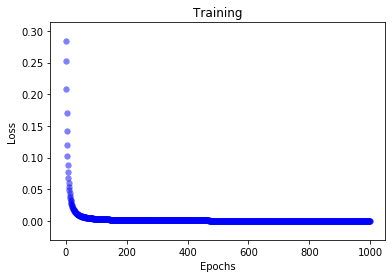

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_hat):
    res = y_true - y_hat
    cost = np.average(res**2, axis=0)
    return cost

def plotLoss(losses, epochs):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.scatter(epochs, losses, color='blue',alpha=0.5, s=40, lw=0)
    plt.title('Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    fig.patch.set_facecolor('white') #sets the color of the border
    plt.show()
    
class NeuralNetwork:
    '''
      A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
      '''
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array of true labels (Margaret=1, Chris=0, John=0, Sadia=1).
        '''
        alpha = 0.5
        epochs = 1000 # number of times to loop through the entire dataset
        iterations = []
        losses = [] # to record loss on each iteration or epoch
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_hat = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_yhat = -2 * (y_true - y_hat)

                # Neuron o1
                d_yhat_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_yhat_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_yhat_d_b3 = deriv_sigmoid(sum_o1)

                d_yhat_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_yhat_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= alpha * d_L_d_yhat * d_yhat_d_h1 * d_h1_d_w1
                self.w2 -= alpha * d_L_d_yhat * d_yhat_d_h1 * d_h1_d_w2
                self.b1 -= alpha * d_L_d_yhat * d_yhat_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= alpha * d_L_d_yhat * d_yhat_d_h2 * d_h2_d_w3
                self.w4 -= alpha * d_L_d_yhat * d_yhat_d_h2 * d_h2_d_w4
                self.b2 -= alpha * d_L_d_yhat * d_yhat_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= alpha * d_L_d_yhat * d_yhat_d_w5
                self.w6 -= alpha * d_L_d_yhat * d_yhat_d_w6
                self.b3 -= alpha * d_L_d_yhat * d_yhat_d_b3

            # --- Calculate total loss at the end of each epoch
            y_hats = np.apply_along_axis(self.feedforward, 1, data) #apply along data columns (-2,-1), ..
            #print("y_hats:", y_hats)
            loss = mse_loss(all_y_trues, y_hats)
            losses.append(loss)
            iterations.append(epoch)
            
            
            if epoch % 50 == 0:
                print("Epoch %d loss: %.3f" % (epoch, loss))               
                
        return losses, iterations 
        
# Define dataset
data = np.array([
  [-2, -1],  # Margaret
  [25, 6],   # Chris
  [17, 4],   # John
  [-15, -6], # Sadia
])
all_y_trues = np.array([
  1, # Margaret
  0, # Chris
  0, # John
  1, # Sadia
])

# Train our neural network!
network = NeuralNetwork()
losses, epochs = network.train(data, all_y_trues)

plotLoss(losses, epochs)
#print (losses)

## Testing
Lets make quick testing.

In [24]:
# Make some predictions
Emily = np.array([-7, -3]) # 128 pounds, 63 inches
Frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(Emily)) 
print("Frank: %.3f" % network.feedforward(Frank)) 

Emily: 0.986
Frank: 0.016
